## Import Library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

## Load data

In [2]:
df = pd.read_excel("ENB2012_dat.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Featured Data

In [4]:
df1 = df.drop(["Y1", 'Y2'], axis = 1)

In [5]:
df1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


## EDA

In [8]:
df1.nunique(), df1.shape

(X1    12
 X2    12
 X3     7
 X4     4
 X5     2
 X6     4
 X7     4
 X8     6
 dtype: int64,
 (768, 8))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


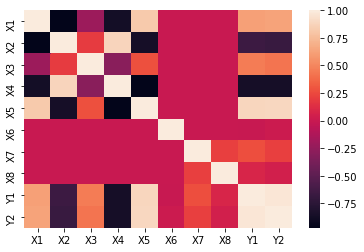

In [14]:
sns.heatmap(
    df.corr(),
    center=None,
    robust=True,
    annot=None,
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    ax=None
)

## Model Building

In [15]:
from sklearn import linear_model

In [16]:
x = df.iloc[:,:-2].values

In [17]:
x

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 3.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 4.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 4.000e-01,
        5.000e+00]])

In [18]:
y1 = df.iloc[:,-2].values

In [19]:
y1

array([15.55, 15.55, 15.55, 15.55, 20.84, 21.46, 20.71, 19.68, 19.5 ,
       19.95, 19.34, 18.31, 17.05, 17.41, 16.95, 15.98, 28.52, 29.9 ,
       29.63, 28.75, 24.77, 23.93, 24.77, 23.93,  6.07,  6.05,  6.01,
        6.04,  6.37,  6.4 ,  6.37,  6.4 ,  6.85,  6.79,  6.77,  6.81,
        7.18,  7.1 ,  7.1 ,  7.1 , 10.85, 10.54, 10.77, 10.56,  8.6 ,
        8.49,  8.45,  8.5 , 24.58, 24.63, 24.63, 24.59, 29.03, 29.87,
       29.14, 28.09, 26.28, 26.91, 26.37, 25.27, 23.53, 24.03, 23.54,
       22.58, 35.56, 37.12, 36.9 , 35.94, 32.96, 32.12, 32.94, 32.21,
       10.36, 10.43, 10.36, 10.39, 10.71, 10.8 , 10.7 , 10.75, 11.11,
       11.13, 11.09, 11.16, 11.68, 11.69, 11.7 , 11.69, 15.41, 15.2 ,
       15.42, 15.21, 12.96, 12.97, 12.93, 13.02, 24.29, 24.31, 24.13,
       24.25, 28.88, 29.68, 28.83, 27.9 , 26.48, 27.02, 26.33, 25.36,
       23.75, 24.23, 23.67, 22.79, 35.65, 37.26, 36.97, 36.03, 33.16,
       32.4 , 33.12, 32.41, 10.42, 10.46, 10.32, 10.45, 10.64, 10.72,
       10.55, 10.68,

In [20]:
print(x.shape)

(768, 8)


In [21]:
print(y1.shape)

(768,)


In [22]:
y2 = df.iloc[:,-1].values

In [23]:
y2.shape

(768,)

In [24]:
x

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 3.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 4.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 4.000e-01,
        5.000e+00]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2, random_state = 10)

In [27]:
for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = reg.predict(x_test)

In [32]:
x_train

array([[7.400e-01, 6.860e+02, 2.450e+02, ..., 2.000e+00, 1.000e-01,
        2.000e+00],
       [7.100e-01, 7.105e+02, 2.695e+02, ..., 2.000e+00, 1.000e-01,
        3.000e+00],
       [7.900e-01, 6.370e+02, 3.430e+02, ..., 5.000e+00, 2.500e-01,
        1.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 2.500e-01,
        5.000e+00],
       [7.100e-01, 7.105e+02, 2.695e+02, ..., 3.000e+00, 1.000e-01,
        2.000e+00],
       [7.400e-01, 6.860e+02, 2.450e+02, ..., 3.000e+00, 1.000e-01,
        5.000e+00]])

In [33]:
y_train.shape

(614,)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
print(y_test.shape)
print(y_pred.shape)

(154,)
(154,)


In [36]:
mean_squared_error(y_test, y_pred)

6.775367635236576

In [37]:
mt.sqrt(mean_squared_error(y_test, y_pred))

2.602953636781988

In [38]:
y2

array([21.33, 21.33, 21.33, 21.33, 28.28, 25.38, 25.16, 29.6 , 27.3 ,
       21.97, 23.49, 27.87, 23.77, 21.46, 21.16, 24.93, 37.73, 31.27,
       30.93, 39.44, 29.79, 29.68, 29.79, 29.4 , 10.9 , 11.19, 10.94,
       11.17, 11.27, 11.72, 11.29, 11.67, 11.74, 12.05, 11.73, 11.93,
       12.4 , 12.23, 12.4 , 12.14, 16.78, 16.8 , 16.75, 16.67, 12.07,
       12.22, 12.08, 12.04, 26.47, 26.37, 26.44, 26.29, 32.92, 29.87,
       29.58, 34.33, 30.89, 25.6 , 27.03, 31.73, 27.31, 24.91, 24.61,
       28.51, 41.68, 35.28, 34.43, 43.33, 33.87, 34.07, 34.14, 33.67,
       13.43, 13.71, 13.48, 13.7 , 13.8 , 14.28, 13.87, 14.27, 14.28,
       14.61, 14.3 , 14.45, 13.9 , 13.72, 13.88, 13.65, 19.37, 19.43,
       19.34, 19.32, 14.34, 14.5 , 14.33, 14.27, 25.95, 25.63, 26.13,
       25.89, 32.54, 29.44, 29.36, 34.2 , 30.91, 25.63, 27.36, 31.9 ,
       27.38, 25.02, 24.8 , 28.79, 41.07, 34.62, 33.87, 42.86, 33.91,
       34.07, 34.17, 33.78, 13.39, 13.72, 13.57, 13.79, 13.67, 14.11,
       13.8 , 14.21,

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = 0.2, random_state = 10)

In [40]:
for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [41]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = reg.predict(x_test)

In [43]:
mean_squared_error(y_test, y_pred) , mt.sqrt(mean_squared_error(y_test, y_pred))

(8.057444277782201, 2.8385637702511106)